In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Titanic.csv")
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Survived'}>]], dtype=object)

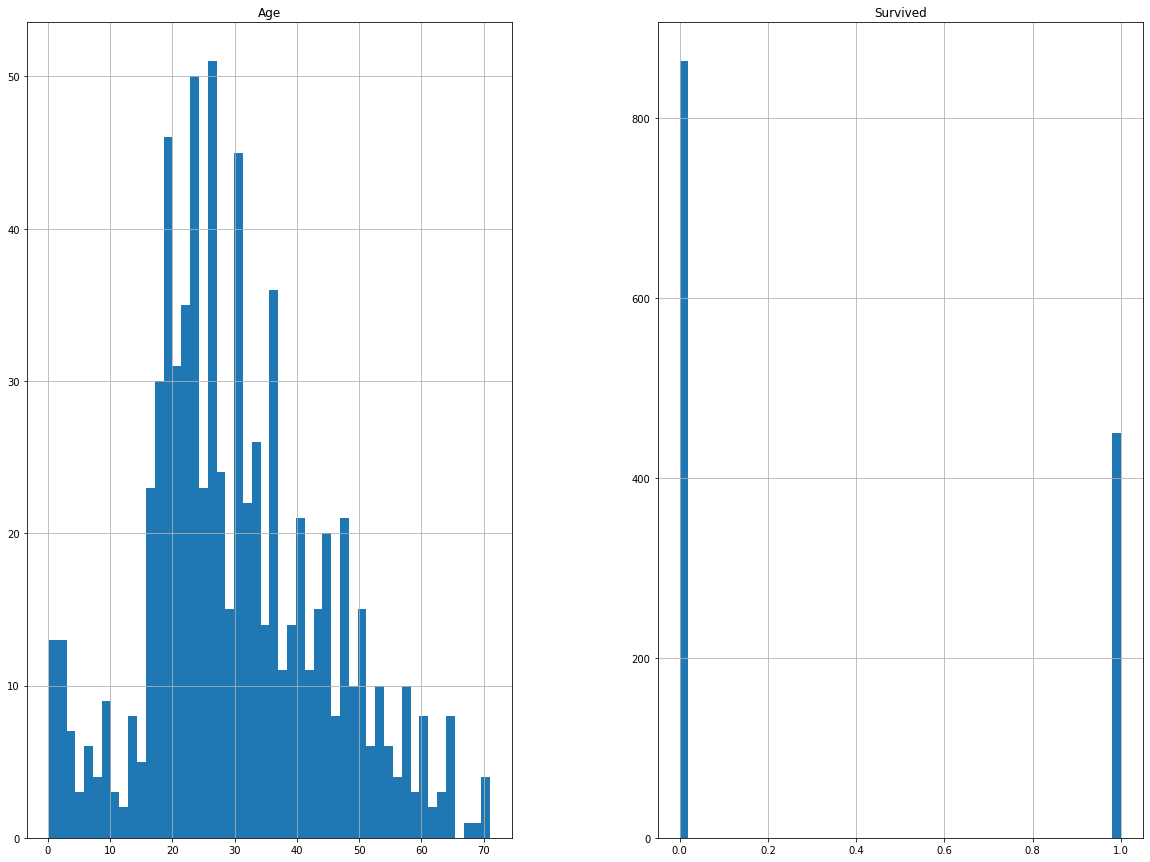

In [3]:
data.hist(bins=50,figsize=(20,15))

In [4]:
cor_mat=data.corr()
cor_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Age        -0.061254
Name: Survived, dtype: float64

In [5]:
data1=pd.read_csv("train.csv")
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(len(np.array(data1)))
len(data1['Cabin'].unique())

891


148

In [7]:
cor_mat1=data1.corr()
cor_mat1['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

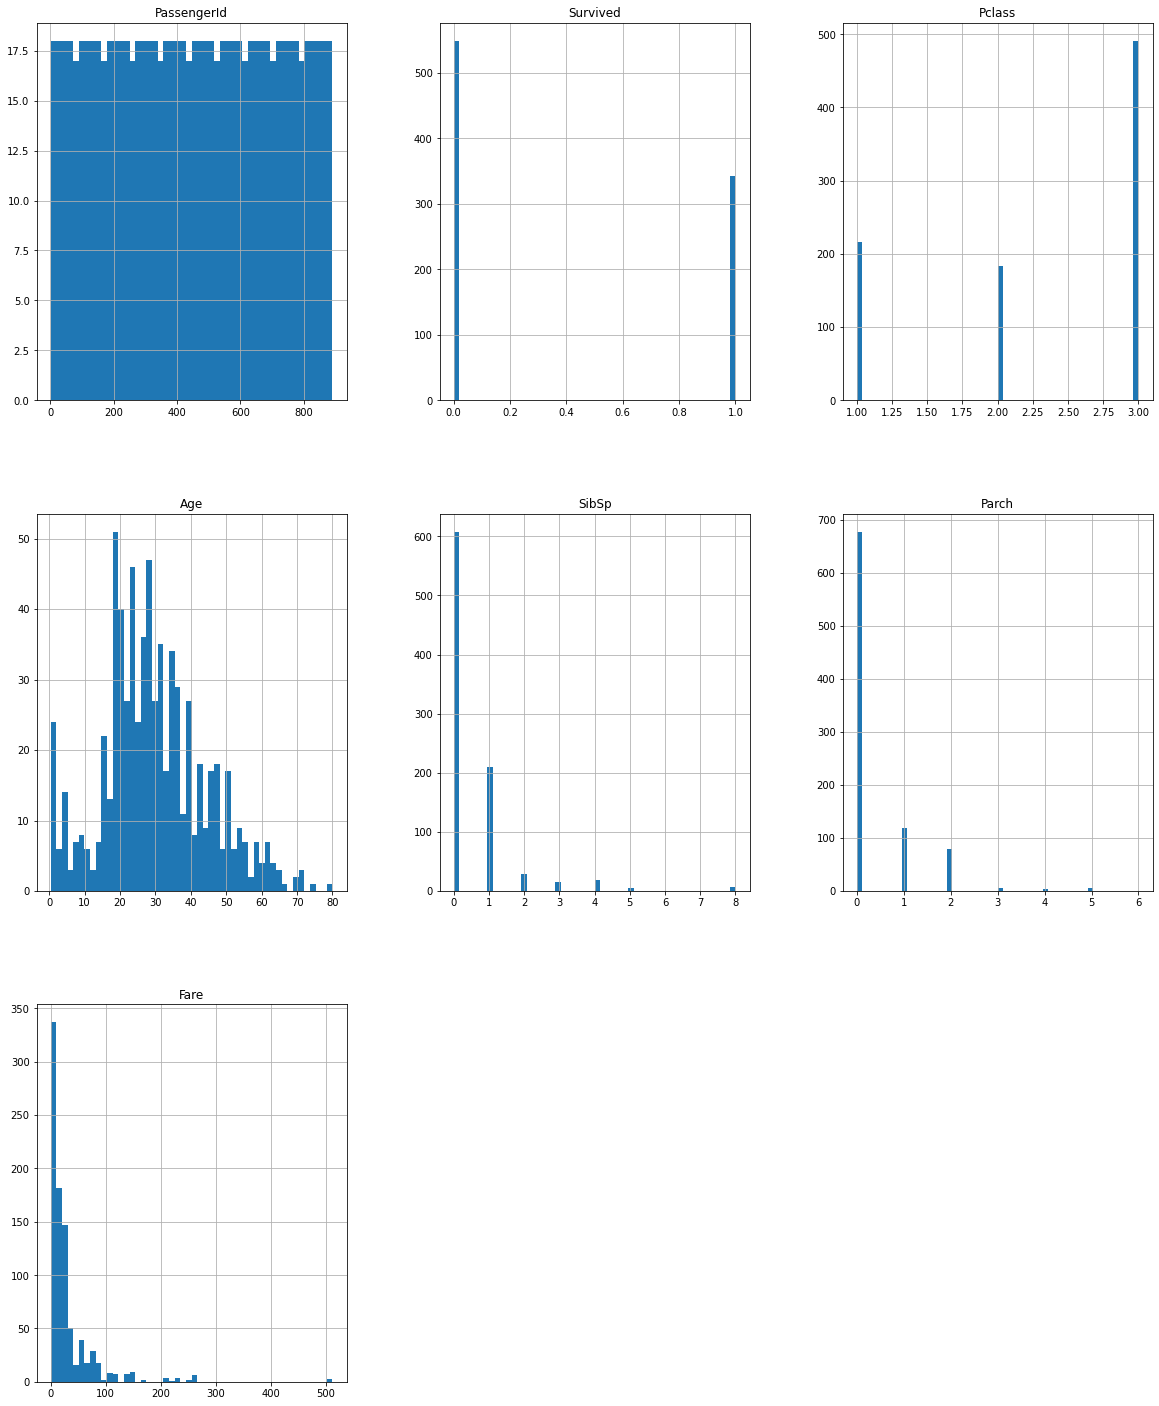

In [8]:
data1.hist(bins=50,figsize=(20,25))

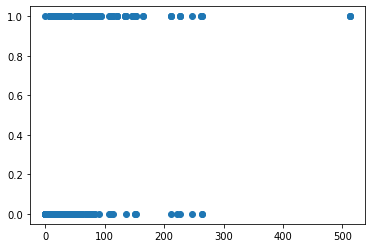

In [9]:
plt.scatter(data1['Fare'],data1['Survived'])

In [10]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data1.info()
data2=data1.drop(['PassengerId','Name','Parch','Ticket'],axis='columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
l= preprocessing.LabelEncoder()
data2['Embarked_n']=l.fit_transform(data2['Embarked'])
data2['Cabin_n']=l.fit_transform(data2['Cabin'])
data2['Sex_n']=l.fit_transform(data2['Sex'])
data2.drop(['Embarked','Cabin','Sex'],axis='columns',inplace=True)
imputer=SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer.fit(data2)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_n  891 non-null    int32  
 6   Cabin_n     891 non-null    int32  
 7   Sex_n       891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [13]:
data2.head()

,Survived,Pclass,Age,SibSp,Fare,Embarked_n,Cabin_n,Sex_n
0,0,3,22.0,1,7.2500,2,147,1
1,1,1,38.0,1,71.2833,0,81,0
2,1,3,26.0,0,7.9250,2,147,0
3,1,1,35.0,1,53.1000,2,55,0
4,0,3,35.0,0,8.0500,2,147,1


In [14]:
training_data=data2.drop(['SibSp', 'Age'],axis='columns')

In [15]:
training_data.head()

,Survived,Pclass,Fare,Embarked_n,Cabin_n,Sex_n
0,0,3,7.2500,2,147,1
1,1,1,71.2833,0,81,0
2,1,3,7.9250,2,147,0
3,1,1,53.1000,2,55,0
4,0,3,8.0500,2,147,1


In [16]:
# def sigmoid(x):
#     v=1/(1+np.exp(-x))
#     if v>=0.5:
#         return 1
#     else:
#         return 0
#     return v
def gradient_decent(training_data,x,y,w,b,number_of_iterations):
    m=len(x)
    n=len(training_data.columns)-1
    a=0.02
    for i in range(number_of_iterations):
        value=np.dot(w.T,x.T)+b
        v=1/(1+np.exp(-value))
        error=v-y
        dw=(a/m)*(np.dot(x.T,error.T))
        db=(a/m)*np.sum(error)
        w=w-dw
        b-=db
    w1=np.array([w[i][0] for i in range(n)])
    return w1,b[0]
def predict(data_point,w,b):
    n=len(data_point)
    b1=np.full((1,n),b)
    value=np.dot(w.T,data_point.T)+b1
    result=1/(1+np.exp(-value))
    return result

In [17]:
test_data=pd.read_csv('test.csv')
new_test=test_data.drop(['Name','Ticket','Parch', 'PassengerId', 'SibSp', 'Age'],axis='columns')
l= preprocessing.LabelEncoder()
new_test['Embarked_n']=l.fit_transform(new_test['Embarked'])
new_test['Cabin_n']=l.fit_transform(new_test['Cabin'])
new_test['Sex_n']=l.fit_transform(new_test['Sex'])
new_test.drop(['Embarked','Cabin','Sex'],axis='columns',inplace=True)
imputer=SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer.fit(new_test)
new_test.fillna(value=new_test['Fare'].mean(), inplace=True)
new_test.head()
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Fare        418 non-null    float64
 2   Embarked_n  418 non-null    int32  
 3   Cabin_n     418 non-null    int32  
 4   Sex_n       418 non-null    int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 11.6 KB


In [18]:
number_of_iterations=100000
np.random.seed(42)
x=np.array(training_data.drop(['Survived'],axis='columns'))
y=np.array(training_data['Survived'])
m=len(x)
n=len(training_data.columns)-1
w=np.zeros(n)
b=np.full((1,m),0).astype('float32')
x1=np.array(training_data.drop(['Survived'],axis='columns'))
y1=np.array(training_data['Survived'])
w1,b1=gradient_decent(training_data,x1,y1,w,b,number_of_iterations)
predicted=predict(np.array(new_test),w1,b1[0])[0]
gs=pd.read_csv('gender_submission.csv')
actual=gs['Survived']

In [19]:
def r_squared(Y, Y_HAT):
    n=len(Y)
    x=(Y_HAT+1)/(Y+1)
    X_1=np.log(x)
    diff=np.sum(X_1)
    r=np.sqrt((1/n)*(diff**2))
    return r
r_test=r_squared(actual,predicted)
# r_train=r_squared(actual_train,predicted_train)
print("prediction accuracy of testing set",r_test)
# print("prediction accuracy of training set",r_train*100,'%')

prediction accuracy of testing set 2.836080991457025


In [20]:
import math
result=0
for i in range(len(actual)):
    if math.isnan(predicted[i])==1:
        if np.nan_to_num(predicted[i])-actual[i]==0:
                result+=1
    else:
        if int(predicted[i])-actual[i]==0:
            result+=1
final=(result/len(actual))*100
print("Accuracy is",final,"%")

Accuracy is 96.65071770334929 %


In [21]:
for i in range(len(actual)):
    if math.isnan(predicted[i])==1:
        print(np.nan_to_num(predicted[i]),"   ",actual[i])
    else:
        print(int(predicted[i]),"   ",actual[i])

0     0
1     1
0     0
0     0
1     1
0     0
1     1
0     0
1     1
0     0
0     0
0     0
1     1
0     0
1     1
1     1
0     0
0     0
1     1
1     1
1     0
0     0
1     1
1     0
1     1
0     0
1     1
0     0
0     0
0     0
0     0
0     0
1     1
1     1
0     0
0     0
1     1
1     1
0     0
0     0
0     0
0     0
0     0
1     1
1     1
0     0
0     0
0     0
1     1
1     1
0     0
0     0
1     1
1     1
0     0
0     0
0     0
0     0
0     0
1     1
0     0
0     0
0     0
1     1
1     0
1     1
1     1
0     0
0     0
1     1
1     1
0     0
1     1
0     0
1     1
1     0
0     0
1     1
0     0
1     1
0     0
1     0
0     0
0     0
0     0
0     0
1     1
1     1
1     1
0     0
1     1
0     0
1     1
0     0
0     0
0     0
1     1
0     0
1     1
0     0
1     1
0     0
0     0
0     0
1     1
0     0
0     0
0     0
0     0
0     0
0     0
1     1
1     1
1     1
1     1
0     0
0     0
1     1
0     0
1     1
1     1
0     0
1     1
0     0
0     0


In [22]:
# predicted

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x1=np.array(training_data.drop(['Survived'],axis='columns'))
y1=np.array(training_data['Survived'])
clf = LogisticRegression(random_state=0).fit(x1, y1)
pre=clf.predict(new_test)

In [24]:
import math
result=0
for i in range(len(actual)):
    if math.isnan(pre[i])==1:
        if np.nan_to_num(pre[i])-actual[i]==0:
                result+=1
    else:
        if int(pre[i])-actual[i]==0:
            result+=1
final=(result/len(actual))*100
print("Accuracy is",final,"%")

Accuracy is 93.30143540669856 %


In [25]:
sub=pd.read_csv("submission1.csv")
p=sub['Survived']
result=0
for i in range(len(actual)):
    if math.isnan(p[i])==1:
        if np.nan_to_num(p[i])-actual[i]==0:
                result+=1
    else:
        if int(p[i])-actual[i]==0:
            result+=1
final=(result/len(actual))*100
print("Accuracy is",final,"%")

Accuracy is 85.4066985645933 %


In [26]:
sub2=pd.read_csv("submission.csv")
p=sub2['Survived']
result=0
for i in range(len(actual)):
    if math.isnan(p[i])==1:
        if np.nan_to_num(p[i])-actual[i]==0:
                result+=1
    else:
        if int(p[i])-actual[i]==0:
            result+=1
final=(result/len(actual))*100
print("Accuracy is",final,"%")

Accuracy is 76.55502392344498 %
